<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-11-09 11:01:12
-------------------
qualified stocks: 87
with latest results: 26
still star stocks: 16
-------------------
Initial Investment:  1.26 C
CY Investment:  1.53 C
Reserve:  1.05 L
Current:  1.43 C
-------------------
Today PnL: -16.39 K (-0.11%)
Current PnL: -21.78 L (-14.27%)
CY Booked + Current PnL: -9.13 L (-5.98%)
-------------------
Total profit:  2.05 L
Total loss:  -23.83 L
-------------------
Total Booked + Current PnL: 17.85 L (14.21%)
Total Booked PnL: 39.63 L (31.55%)
Curr Year Booked PnL: 12.65 L (8.86%)
Prev Year Booked PnL: 26.98 L (21.48%)
Est FTT:  2.32 C
Est FTT PnL: 88.77 L (62.17%)
Deployed:  1.26 C
Current:  1.43 C
CAGR/XIRR %: 7.47%
Row successfully appended and saved to data/myPortfolioDB.csv.


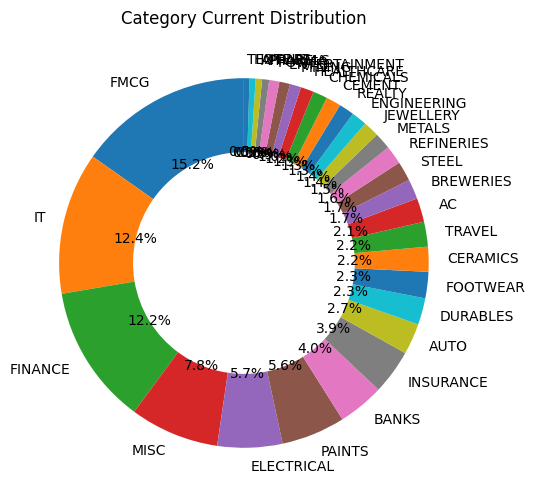

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 1

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Spread%', 'Conviction', 'RSI_14', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Category','Strategy']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
58,RELIANCE,1348.50,1533.00,-7.93,6.42,X-LC,60.0,230568.0,20202.0,8577.0,...,9.60,3.72,13.68,37.0,2.36,1.63,27.71,XY25,REFINERIES,NTT
79,UNIONBANK,123.87,163.00,-3.73,11.83,M-LC,68.0,174302.0,33462.0,11033.0,...,23.76,6.33,31.59,66.0,3.03,1.23,56.54,XY24,BANKS,NTT
78,TTKPRESTIG,769.29,770.00,103.20,1.94,M-SC,53.0,87554.0,-13223.0,13317.0,...,-13.12,15.21,0.09,245.0,-0.99,0.62,15.03,OX40N,DURABLES,NTT
33,ICICIGI,1839.64,2252.93,-12.90,5.87,X-MC,59.0,149495.0,13362.0,17222.0,...,9.82,11.52,22.47,91.0,0.78,1.05,24.07,X40,INSURANCE,ATH
2,ABBOTINDIA,30226.00,35195.00,-14.73,2.91,X-MC,32.0,86355.0,-4323.0,19231.0,...,-4.77,22.27,16.44,101.0,-0.22,0.61,14.45,X40,PHARMA,ATH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,ACC,2379.51,3906.00,-38.07,2.27,X-MC,46.0,184050.0,-53901.0,206541.0,...,-22.65,112.22,64.15,174.0,-0.26,1.30,3.24,XY24,CEMENT,BTT
74,TATAMOTORS,761.77,1065.00,-53.04,34.23,X-LC,22.0,147269.0,-129254.0,239327.0,...,-46.74,162.51,39.81,54.0,-0.54,1.04,3.80,XY24,AUTO,NTT
59,REPCOHOME,463.60,880.00,-53.80,7.77,H-SC,60.0,263021.0,-23484.0,280828.0,...,-8.20,106.77,89.82,134.0,-0.08,1.86,39.16,XY24,FINANCE,NTT
11,BANDHANBNK,207.88,400.00,-16.95,1.99,H-SC,37.0,205971.0,-72588.0,330027.0,...,-26.06,160.23,92.42,151.0,-0.22,1.45,19.04,XY24,BANKS,NTT


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-42.37,4.89,H-LC,34.0,240792.0,-20827.0,140045.0,...,-7.96,58.16,45.57,7.0,-0.15,1.70,2.46,AR,ELECTRICAL,NTT
2,ABBOTINDIA,30226.00,35195.00,-14.73,2.91,X-MC,32.0,86355.0,-4323.0,19231.0,...,-4.77,22.27,16.44,101.0,-0.22,0.61,14.45,X40,PHARMA,ATH
3,ACC,2379.51,3906.00,-38.07,2.27,X-MC,46.0,184050.0,-53901.0,206541.0,...,-22.65,112.22,64.15,174.0,-0.26,1.30,3.24,XY24,CEMENT,BTT
5,ANGELONE,2329.34,3033.00,21.37,6.09,X-SC,67.0,214545.0,23539.0,34156.0,...,12.32,15.92,30.21,157.0,0.69,1.51,35.78,X40N,FINANCE,NTT
6,ASIANPAINT,2861.00,3465.66,-8.78,5.04,X-LC,71.0,230014.0,-21754.0,74962.0,...,-8.64,32.59,21.13,27.0,-0.29,1.62,23.72,X40,PAINTS,ATH
9,AWL,315.97,485.00,-63.46,2.22,X-SC,54.0,258614.0,-43137.0,204564.0,...,-14.30,79.10,53.50,116.0,-0.21,1.82,14.87,XY24,FMCG,NTT
10,BAJAJHFL,122.26,181.50,-14.65,6.24,X-MC,45.0,179580.0,-20926.0,118074.0,...,-10.44,65.75,48.45,90.0,-0.18,1.27,3.56,X40N,FINANCE,ATH
12,BATAINDIA,1550.24,2096.00,-6.42,7.73,X-SC,30.0,88138.0,-40532.0,85829.0,...,-31.50,97.38,35.20,219.0,-0.47,0.62,1.16,X40,FOOTWEAR,NTT
13,BERGEPAINT,561.33,680.00,-19.87,1.16,X-MC,44.0,215075.0,-12264.0,60329.0,...,-5.39,28.05,21.14,106.0,-0.20,1.52,21.23,XY24,PAINTS,NTT
16,CAMS,3816.00,4762.00,-6.41,0.90,X-SC,46.0,250490.0,-1366.0,63800.0,...,-0.54,25.47,24.79,122.0,-0.02,1.77,22.47,X40N,MISC,NTT


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
0,5PAISA,525.23,593.0,85.10,15.35,H-SC,22.0,125736.0,-92760.0,120958.0,...,-42.45,96.20,12.90,153.0,-0.77,0.89,0.00,OX40N,FINANCE,NTT
17,CERA,7647.97,9475.0,-24.34,1.85,H-SC,42.0,137931.0,-37972.0,80000.0,...,-21.59,58.00,23.89,149.0,-0.47,0.97,19.12,OX40N,CERAMICS,NTT
37,INDIGOPNTS,1407.73,1408.0,89.73,6.37,M-SC,37.0,124508.0,-50051.0,50090.0,...,-28.67,40.23,0.02,221.0,-1.00,0.88,8.30,OX40N,PAINTS,NTT
42,JCHAC,2282.24,2282.0,19921.74,1.51,M-SC,62.0,97860.0,-29945.0,29935.0,...,-23.43,30.59,-0.01,232.0,-1.00,0.69,10.81,OX40N,AC,NTT
45,KANSAINER,299.63,340.0,-67.72,2.75,H-SC,45.0,221688.0,-47979.0,84308.0,...,-17.79,38.03,13.47,138.0,-0.57,1.56,12.72,XY24,PAINTS,NTT
54,RAJESHEXPO,517.65,518.0,1646.21,3.95,L-SC,45.0,47647.0,-89530.0,89624.0,...,-65.27,188.10,0.07,267.0,-1.00,0.34,18.50,OX40N,JEWELLERY,NTT
64,SFL,1016.35,1287.0,33.53,3.61,M-SC,49.0,176214.0,-86004.0,155826.0,...,-32.80,88.43,26.63,229.0,-0.55,1.24,9.56,XY24,MISC,NTT
67,SIS,435.42,528.0,2001.55,2.51,H-SC,43.0,84813.0,-26219.0,49828.0,...,-23.61,58.75,21.26,156.0,-0.53,0.60,14.59,OX40N,MISC,NTT
71,SYMPHONY,1306.42,1306.0,-44.56,16.44,M-SC,43.0,118083.0,-53058.0,53007.0,...,-31.00,44.89,-0.03,196.0,-1.00,0.83,2.95,OX40N,DURABLES,NTT
73,TATAELXSI,6938.68,9161.0,-27.24,6.38,H-MC,32.0,98420.0,-33415.0,75636.0,...,-25.35,76.85,32.03,98.0,-0.44,0.69,10.24,OX40N,IT,NTT


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
3,ACC,2379.51,3906.00,-38.07,2.27,X-MC,46.0,184050.0,-53901.0,206541.0,...,-22.65,112.22,64.15,174.0,-0.26,1.30,3.24,XY24,CEMENT,BTT
8,ATULAUTO,579.80,844.00,3272.97,3.26,M-SC,30.0,151555.0,-45577.0,135399.0,...,-23.12,89.34,45.57,236.0,-0.34,1.07,7.45,XY24,AUTO,NTT
9,AWL,315.97,485.00,-63.46,2.22,X-SC,54.0,258614.0,-43137.0,204564.0,...,-14.30,79.10,53.50,116.0,-0.21,1.82,14.87,XY24,FMCG,NTT
11,BANDHANBNK,207.88,400.00,-16.95,1.99,H-SC,37.0,205971.0,-72588.0,330027.0,...,-26.06,160.23,92.42,151.0,-0.22,1.45,19.04,XY24,BANKS,NTT
13,BERGEPAINT,561.33,680.00,-19.87,1.16,X-MC,44.0,215075.0,-12264.0,60329.0,...,-5.39,28.05,21.14,106.0,-0.20,1.52,21.23,XY24,PAINTS,NTT
15,CAMPUS,294.86,393.00,-24.34,4.72,M-SC,48.0,157499.0,-10276.0,66118.0,...,-6.13,41.98,33.28,210.0,-0.16,1.11,22.07,XY24,FOOTWEAR,NTT
18,COALINDIA,406.65,484.83,4.32,2.45,L-LC,48.0,139120.0,-11340.0,40261.0,...,-7.54,28.94,19.23,167.0,-0.28,0.98,12.14,XY25,MINING,ATH
20,COLPAL,2633.65,3726.84,-7.07,7.19,X-MC,39.0,216720.0,-46645.0,155973.0,...,-17.71,71.97,41.51,84.0,-0.30,1.53,1.70,XY25,FMCG,ATH
21,DABUR,511.48,735.00,-7.01,2.98,X-MC,59.0,251545.0,3477.0,104919.0,...,1.40,41.71,43.70,102.0,0.03,1.77,16.66,XY24,FMCG,BTT
24,EASEMYTRIP,18.12,26.40,-18.55,27.37,M-SC,47.0,78357.0,-98458.0,179257.0,...,-55.68,228.77,45.70,197.0,-0.55,0.55,2.29,XY24,TRAVEL,NTT


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5450.40,7934.00,-42.37,4.89,H-LC,34.0,240792.0,-20827.0,140045.0,...,-7.96,58.16,45.57,7.0,-0.15,1.70,2.46,AR,ELECTRICAL,NTT
4,ALKYLAMINE,2347.98,4546.37,-18.90,4.42,H-SC,32.0,76441.0,-24522.0,119049.0,...,-24.29,155.74,93.63,148.0,-0.21,0.54,13.86,SR,CHEMICALS,ATH
7,ASIANTILES,75.41,137.00,7350.00,12.30,L-SC,63.0,81768.0,-12042.0,88661.0,...,-12.84,108.43,81.67,269.0,-0.14,0.58,58.35,XR,CERAMICS,NTT
14,BSOFT,551.58,836.99,-14.02,10.77,H-SC,59.0,96454.0,-44199.0,116979.0,...,-31.42,121.28,51.74,131.0,-0.38,0.68,11.59,XR,IT,ATH
19,COFFEEDAY,59.14,80.00,-49.70,27.52,L-SC,35.0,74861.0,-38688.0,78739.0,...,-34.07,105.18,35.27,268.0,-0.49,0.53,83.22,XR,HOTELS,NTT
22,DEN,52.79,75.00,86.53,4.75,M-SC,39.0,52240.0,-32224.0,67761.0,...,-38.15,129.71,42.07,237.0,-0.48,0.37,10.94,AR,ENTERTAINMENT,NTT
26,HAPPSTMNDS,801.03,1480.71,-26.54,16.46,H-SC,35.0,79136.0,-49029.0,157781.0,...,-38.25,199.38,84.85,132.0,-0.31,0.56,1.57,AR,IT,ATH
27,HATHWAY,18.12,31.40,831.16,8.41,H-SC,33.0,80040.0,-28680.0,108358.0,...,-26.38,135.38,73.29,161.0,-0.26,0.56,7.06,XR,ENTERTAINMENT,NTT
35,IEX,147.35,219.00,-34.09,16.03,H-SC,45.0,188569.0,-11385.0,108616.0,...,-5.69,57.60,48.63,115.0,-0.10,1.33,5.20,XR,MISC,NTT
36,INDIAMART,2327.09,4810.62,-53.52,5.40,H-SC,52.0,129718.0,6382.0,125243.0,...,5.17,96.55,106.72,119.0,0.05,0.92,29.76,AR,MISC,ATH


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.70
1,20,36.64
2,30,51.53


In [10]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,45.69
LC,31.36
MC,22.93


In [11]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,30.02
X40,16.25
X40N,12.48
XY25,11.92
XR,9.85
AR,7.79
OX40N,6.51
X200,1.77
X5K,1.46


In [12]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,24.20
X-LC,20.70
X-MC,18.59
M-SC,12.64
X-SC,7.40
M-LC,5.14
H-LC,4.54
H-MC,2.31
M-MC,1.71


In [13]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          9.74
X40       X-LC          8.89
          X-MC          6.74
XY24      M-SC          6.10
XR        H-SC          6.03
XY25      X-LC          5.41
X40N      X-SC          4.61
XY24      X-MC          4.59
X40N      X-MC          4.33
AR        H-SC          4.04
X40N      X-LC          3.54
OX40N     M-SC          3.02
XY25      X-MC          2.93
XY24      X-LC          2.86
AR        H-LC          2.77
OX40N     H-SC          2.46
XY24      X-SC          2.17
X200      H-LC          1.77
XY24      M-MC          1.71
          H-MC          1.62
X5K       M-LC          1.46
XY25      M-LC          1.42
XR        M-SC          1.36
XY24      M-LC          1.23
XY25      M-SC          1.18
XR        L-SC          1.11
SR        H-SC          1.04
XR        M-LC          1.03
AR        M-SC          0.98
XY25      L-LC          0.98
MH        H-SC          0.89
OX40N     H-MC          0.69
X40       X-SC          0.62
OX40N     L-SC          0.34
XR        L-MC          0.32
Name: CurrAlloc%, dtype: float64

In [14]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,15.22,-4.79,38.67
IT,12.43,-19.32,83.24
FINANCE,12.23,-9.20,58.69
MISC,7.80,-17.48,76.74
ELECTRICAL,5.68,-12.27,52.08
PAINTS,5.58,-16.69,34.08
BANKS,4.03,-18.15,86.89
INSURANCE,3.91,0.24,36.95
AUTO,2.72,-49.39,111.74


In [15]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,75.21,10662947.0,-10.48,-1117989.0,52.97,5648178.0


In [16]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,57.67,8176143.0,-7.23,-590855.0,43.48,3554740.0


In [17]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3317522.0
XR,1259892.0
AR,1184879.0
X40,851306.0
X40N,699106.0
OX40N,562395.0
XY25,484739.0
SR,274615.0
X5K,111233.0


In [18]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,3401745.0
M-SC,1253562.0
X-LC,1062550.0
X-MC,1057132.0
X-SC,761508.0
H-LC,295505.0
M-LC,280626.0
H-MC,259783.0
L-SC,257024.0


In [19]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          1192250.0
AR        H-SC           839953.0
XR        H-SC           786723.0
XY24      M-SC           722866.0
X40       X-LC           464153.0
XY24      X-MC           371789.0
          X-SC           370883.0
          X-LC           314745.0
X40N      X-SC           304796.0
X40       X-MC           301324.0
SR        H-SC           274615.0
OX40N     H-SC           250786.0
AR        H-LC           221947.0
X40N      X-LC           197544.0
          X-MC           196766.0
XY25      X-MC           187253.0
XY24      H-MC           184147.0
XR        L-SC           167400.0
XY24      M-MC           149809.0
OX40N     M-SC           146349.0
XR        M-SC           134831.0
XY25      M-SC           126537.0
AR        M-SC           122979.0
XR        M-LC           113780.0
X5K       M-LC           111233.0
OX40N     L-SC            89624.0
XY25      X-LC            86108.0
X40       X-SC            85829.0
OX40N     H-MC            75636.0
X200      H-LC            73558.0
MH        H-SC            57418.0
XR        L-MC            57158.0
XY25      M-LC            44580.0
          L-LC            40261.0
XY24      M-LC            11033.0
Name: FTT Amt, dtype: float64

In [20]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,24
M-SC,15
X-MC,14
X-LC,12
X-SC,7
M-LC,4
H-LC,3
L-SC,3
H-MC,2
